<a href="https://colab.research.google.com/github/RodriBC/DeepL/blob/main/notebooks/Deep_Learning_Clase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning 101 - Clase 2  🧠

> **Descripción:** Cuaderno de contenidos (II) sobre introducción a _deep learning_ para el Bootcamp en DS con Código Facilito, 2022. <br>
> **Autor:** [Rodolfo Ferro](https://github.com/RodolfoFerro) <br>
> **Contacto:** [Twitter](https://twitter.com/rodo_ferro) / [Instagram](https://www.instagram.com/rodo_ferro/)


## Contenido

### Sección IV

12. Introducción a redes neuronales
13. Productos matriciales - Composición de funciones
14. Idea intuitiva sobre la retropropagación
15. El problema de separabilidad lineal - XOR

### Sección V

16. Introducción a TensorFlow
17. Mi primera red neuronal
18. Función de pérdida y optimizador
19. Entrenamiento y predicciones

### Sección VI – Tarea

20. El dataset a utilizar
21. Preparación de los datos
22. Creación del modelo
23. Entrenamiento del modelo
24. Evaluación y predicción

## **Sección IV**

### **IMPORTANTE**

El contenido de la sección IV ha sido descrito en su totalidad a través de la presentación.

Conviene revisar el material que puedes encontrar en el [repositorio](https://github.com/RodolfoFerro/dl-facilito-g2).

## **Sección V**

### **Introducción a TensorFlow**

[TensorFlow](https://www.tensorflow.org/) es un framework open-source para Machine Learning desarrollada por Google. Utilizada para construir y entrenar redes neuronales artificiales.

In [1]:
import numpy as np

#keras:
# 1. Sequential -- MLP -- capa, capa, capa
# 2. Model

x = np.array([(0, 1), (1, 1), (1, 0), (0, 0)]) # TODO: Add samples for XOR
y = np.array([1, 0, 1, 0]) # TODO: Add samples for XOR

In [5]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.models.Sequential([

  layers.Dense(2, input_shape=(2,), activation = "sigmoid"), # Add Dense of size 2, input_shape=(2,), activation=???
  layers.Dense(1, activation="sigmoid") # Add Dense of size 1, activation=sigmoid
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.layers[0].get_weights()

[array([[ 0.09761882, -0.46865612],
        [-0.20687962, -0.8763504 ]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [10]:
input_data = np.array([[1, 1]])
model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


array([[0.44046757]], dtype=float32)

### **Optimizador y función de pérdida**

In [11]:
loss = tf.keras.losses.MeanSquaredError()

$$ \mathrm{MSE}=\frac{1}{N}\cdot\sum_{i=1}^N \left(y_i- \hat{y}_i \right )^2 $$

In [12]:
loss([0.5], [0.5])

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [13]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.6)

model.compile(optimizer=optimizer, loss='mse', metrics=[loss])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(x, y, epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step - loss: 0.2601 - mean_squared_error: 0.2601
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - loss: 0.2579 - mean_squared_error: 0.2579
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.2560 - mean_squared_error: 0.2560
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.2545 - mean_squared_error: 0.2545
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.2533 - mean_squared_error: 0.2533
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2523 - mean_squared_error: 0.2523
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2515 - mean_squared_error: 0.2515
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2508 - mean_squared_error: 0.2508
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2503 - mean_squared_error: 0.2503
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2498 - mean_squared_error: 0.2498
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34m

In [16]:
import plotly.express as px


losses = history.history['loss']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y='Error')
)
fig.show()

In [17]:
# Construcción de una rejilla
x = np.linspace(-1, 1.5, 201)
y = np.linspace(-1, 1.5, 201)
xy = np.meshgrid(x, y)
zz = np.array(list(zip(*(x.flat for x in xy))))

# Predicción en la rejilla de valores
surface = model.predict(zz)
surface = surface.flatten()

1263/1263 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [18]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Scatter3d(
    x=zz[:, 0],
    y=zz[:, 1],
    z=surface,
    mode='markers',
    marker=dict(
        size=1,
        color=surface,
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

<center>
    *********
</center>

## **Sección III – Tarea**

### El dataset a utilizar: Fashion MNIST

El dataset está compuesto por imágenes de 28x28 pixeles, que contienen un conjunto de prendas en 10 categorías.


Los datos de Fashion MNIST están disponibles directamente en la API de conjuntos de datos de `tf.keras`. Los cargas así:

In [19]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [20]:
fashion_mnist = tf.keras.datasets.fashion_mnist

Llamar a `load_data` en este objeto nos dará dos conjuntos con los valores de entrenamiento y prueba para los gráficos que contienen las prendas y sus etiquetas.

In [21]:
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


¿Cómo se ven estos valores?

Imprimamos una imagen de entrenamiento y una etiqueta de entrenamiento para ver.

Label: 0
Matrix: [[  0   0   0   0   0   0   0   0   0   0 120  54   0   0   0   0  13 124   0   0   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0  64 173 207 218 206 232 184 168 202 205 218 202 126  12   0   0   1   0   0   0   0]
 [  0   0   0   0   0  56 199 223 222 207 205 211 223 227 231 230 214 203 209 220 213 164   0   0   2   0   0   0]
 [  0   0   0   0   0 191 219 200 200 206 206 205 206 206 203 202 201 202 201 195 198 222 149   0   0   0   0   0]
 [  0   0   0   0  72 224 201 205 208 202 204 204 205 205 208 205 192 188 203 202 200 189 198  23   0   0   0   0]
 [  0   0   0   0 160 221 211 200 204 203 204 203 201 202 201 203 201 185 203 203 188 194 207 126   0   0   0   0]
 [  0   0   0   0 227 212 224 205 201 204 203 202 202 201 201 200 201 195 198 191 182 199 202 202   0   0   0   0]
 [  0   0   0  20 208 205 224 219 201 200 202 202 201 201 199 198 199 199 197 183 195 210 191 189  11   0   0   0]
 [  0   0   0 138 223 201 218 229 216 202 202 200 200 197 197 1

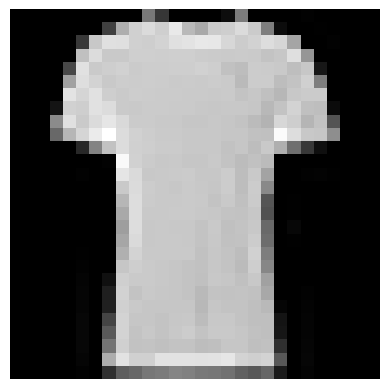

In [22]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 5999 # 6000 -1

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print('Label:', training_labels[img_index])
print('Matrix:', training_images[img_index])

### Preparación de los datos

Notarás que todos los valores están entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones es más fácil si transformamos los valores para tratar todos con valores entre 0 y 1. Este proceso se llama **normalización**.

In [23]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Label: 6
Matrix: [[0.         0.         0.         0.         0.         0.         0.         0.         0.00392157 0.00392157 0.         0.         0.47058824 0.51372549 0.35686275 0.57647059 0.11764706
  0.         0.         0.00392157 0.00392157 0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.00392157 0.01176471 0.         0.         0.         0.         0.98431373 0.78039216 0.6745098  0.76470588 0.59607843
  0.         0.         0.         0.         0.01176471 0.00392157 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.16862745 0.48627451 0.75686275 0.65098039 0.9372549  1.         0.84705882 0.6745098
  0.89411765 0.49411765 0.23921569 0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.        

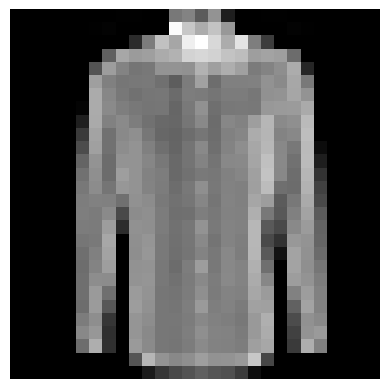

In [24]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 3000 # 6000 -1

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print('Label:', training_labels[img_index])
print('Matrix:', training_images[img_index])

In [25]:
training_images[0].shape

(28, 28)

### Creación del modelo



In [27]:
mlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')

    # TODO. Dense -> 256, ReLU
    # TODO. Dense -> 10, Softmax
])

In [43]:
mlp_model.summary()
#Armar redes neuronales de forma eficiente, ahorrar energía en proceso de computo

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (32, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 256)              │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 10)               │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,532 (795.05 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Entrenamiento del modelo

Para entrenar el modelo, simplemente utilizamos el método `.fit()` del modelo.

In [28]:
mlp_model.compile(
    optimizer=tf.optimizers.SGD(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
history = mlp_model.fit(training_images, training_labels, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7091 - loss: 0.9175
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8263 - loss: 0.5081
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8384 - loss: 0.4630



> **Pregunta clave:** ¿Qué sucede con la historia de entrenamiento?

In [30]:
import plotly.express as px


seen = 'accuracy' # or 'loss'

hist_values = history.history[seen]
eje_x = np.arange(len(hist_values))

fig = px.line(
    x=eje_x,
    y=hist_values,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y=seen.capitalize())
)
fig.show()

### Evaluación del modelo

In [31]:
mlp_model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8417 - loss: 0.4626


[0.4679517149925232, 0.8348000049591064]

### Predicción


9


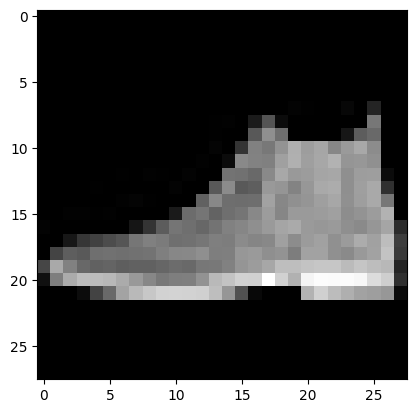

In [32]:
img = test_images[0]
plt.imshow(img, cmap='gray')
print(test_labels[0])

In [36]:
predict = mlp_model.predict(np.expand_dims(test_images[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [37]:
np.argmax(predict)

np.int64(9)

Label: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: 4


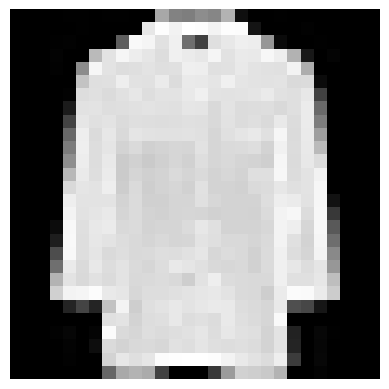

In [41]:
import random

test_index = random.randint(0, 10000 - 1)

plt.imshow(test_images[test_index], cmap='gray')
plt.axis(False)

print('Label:', test_labels[test_index])
input_image = np.reshape(test_images[test_index], (1, 784))
prediction = mlp_model.predict(np.expand_dims(input_image, axis=-1))
print('Prediction:', np.argmax(prediction))

In [42]:
prediction

array([[3.9434668e-02, 3.4123173e-03, 7.4104905e-02, 1.1093529e-02, 6.3249123e-01, 1.0277332e-05, 2.3329701e-01, 9.6253643e-07, 6.1511337e-03, 3.9252591e-06]], dtype=float32)

> **Para resolver la tarea, el reto es:** Mejor accuracy obtenido en la clase.

**Puedes explorar:**
- El número de capas.
- Las épocas de entrenamiento.
- Las funciones de activación.
- Investigar otras capas.

--------

> Contenido creado por **Rodolfo Ferro**, 2022. <br>
> Puedes contactarme a través de Insta ([@rodo_ferro](https://www.instagram.com/rodo_ferro/)) o Twitter ([@rodo_ferro](https://twitter.com/rodo_ferro)).